## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
data = pd.read_csv("../../data/raw/data.csv")

## Parameter Overview 

| Parameter              | Description |
|------------------------|-------------|
| **Area Name**         | Name or identifier of the geographical area. |
| **Daily Min Temp (°C)** | Minimum temperature recorded in a day. |
| **Daily Max Temp (°C)** | Maximum temperature recorded in a day. |
| **Daily Avg Temp (°C)** | Average temperature for the day. |
| **Total Precipitation (mm)** | Total rainfall or precipitation in millimeters. |
| **Relative Humidity (%)** | Percentage of humidity in the air. |
| **Water Bodies (Binary: 0/1)** | Indicates the presence (1) or absence (0) of water bodies in the area. |
| **Population Density (people/km²)** | Number of people per square kilometer in the area. |
| **Day Length (hours)** | Duration of daylight in hours. |
| **Urban / Rural Area (Binary: 0/1)** | Indicates whether the area is urban (1) or rural (0). |
| **Forested Area (Binary: 0/1)** | Indicates the presence (1) or absence (0) of forests. |
| **Crop Area (Binary: 0/1)** | Indicates whether the area is used for agriculture (1) or not (0). |
| **Graze Land Area (Binary: 0/1)** | Indicates whether the area is used for grazing livestock (1) or not (0). |
| **Habitable (Binary: 0/1)** | Indicates whether the area is habitable (1) or not (0). |


## Display Basic Information and Shape of Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area Name            5000 non-null   object 
 1   Daily Min Temp       5000 non-null   float64
 2   Daily Max Temp       5000 non-null   float64
 3   Daily Avg Temp       5000 non-null   float64
 4   Total Precipitation  5000 non-null   float64
 5   Relative Humidity    5000 non-null   float64
 6   Water Bodies         5000 non-null   int64  
 7   Population Density   5000 non-null   int64  
 8   Day Length           5000 non-null   float64
 9   Urban / Rural Area   5000 non-null   int64  
 10  Forested Area        5000 non-null   int64  
 11  Crop Area            5000 non-null   int64  
 12  Graze Land Area      5000 non-null   int64  
 13  Habitable            5000 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 547.0+ KB


In [6]:
data.shape

(5000, 14)

## Summary Statistics

In [7]:
data.describe()

,Daily Min Temp,Daily Max Temp,Daily Avg Temp,Total Precipitation,Relative Humidity,Water Bodies,Population Density,Day Length,Urban / Rural Area,Forested Area,Crop Area,Graze Land Area,Habitable
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,22.452496,32.367414,27.410064,50.137410,65.384256,0.309600,5030.632200,11.990916,0.386400,0.507000,0.501000,0.50060,0.382800
std,4.344518,5.182502,4.563592,29.076931,14.390328,0.462375,2863.002791,1.152585,0.486973,0.500001,0.500049,0.50005,0.486119
min,15.000000,20.190000,17.640000,0.020000,40.010000,0.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,18.657500,28.550000,23.717500,24.717500,53.135000,0.000000,2546.000000,11.010000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,22.500000,32.310000,27.410000,49.620000,65.625000,0.000000,5029.500000,12.010000,0.000000,1.000000,1.000000,1.00000,0.000000
75%,26.220000,36.180000,31.090000,76.065000,77.552500,1.000000,7501.000000,12.980000,1.000000,1.000000,1.000000,1.00000,1.000000
max,30.000000,44.670000,37.210000,99.980000,90.000000,1.000000,9999.000000,14.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Checking for missing values 

In [4]:
data.isnull().sum()

Area Name              0
Daily Min Temp         0
Daily Max Temp         0
Daily Avg Temp         0
Total Precipitation    0
Relative Humidity      0
Water Bodies           0
Population Density     0
Day Length             0
Urban / Rural Area     0
Forested Area          0
Crop Area              0
Graze Land Area        0
Habitable              0
dtype: int64

## Distribution of numerical features

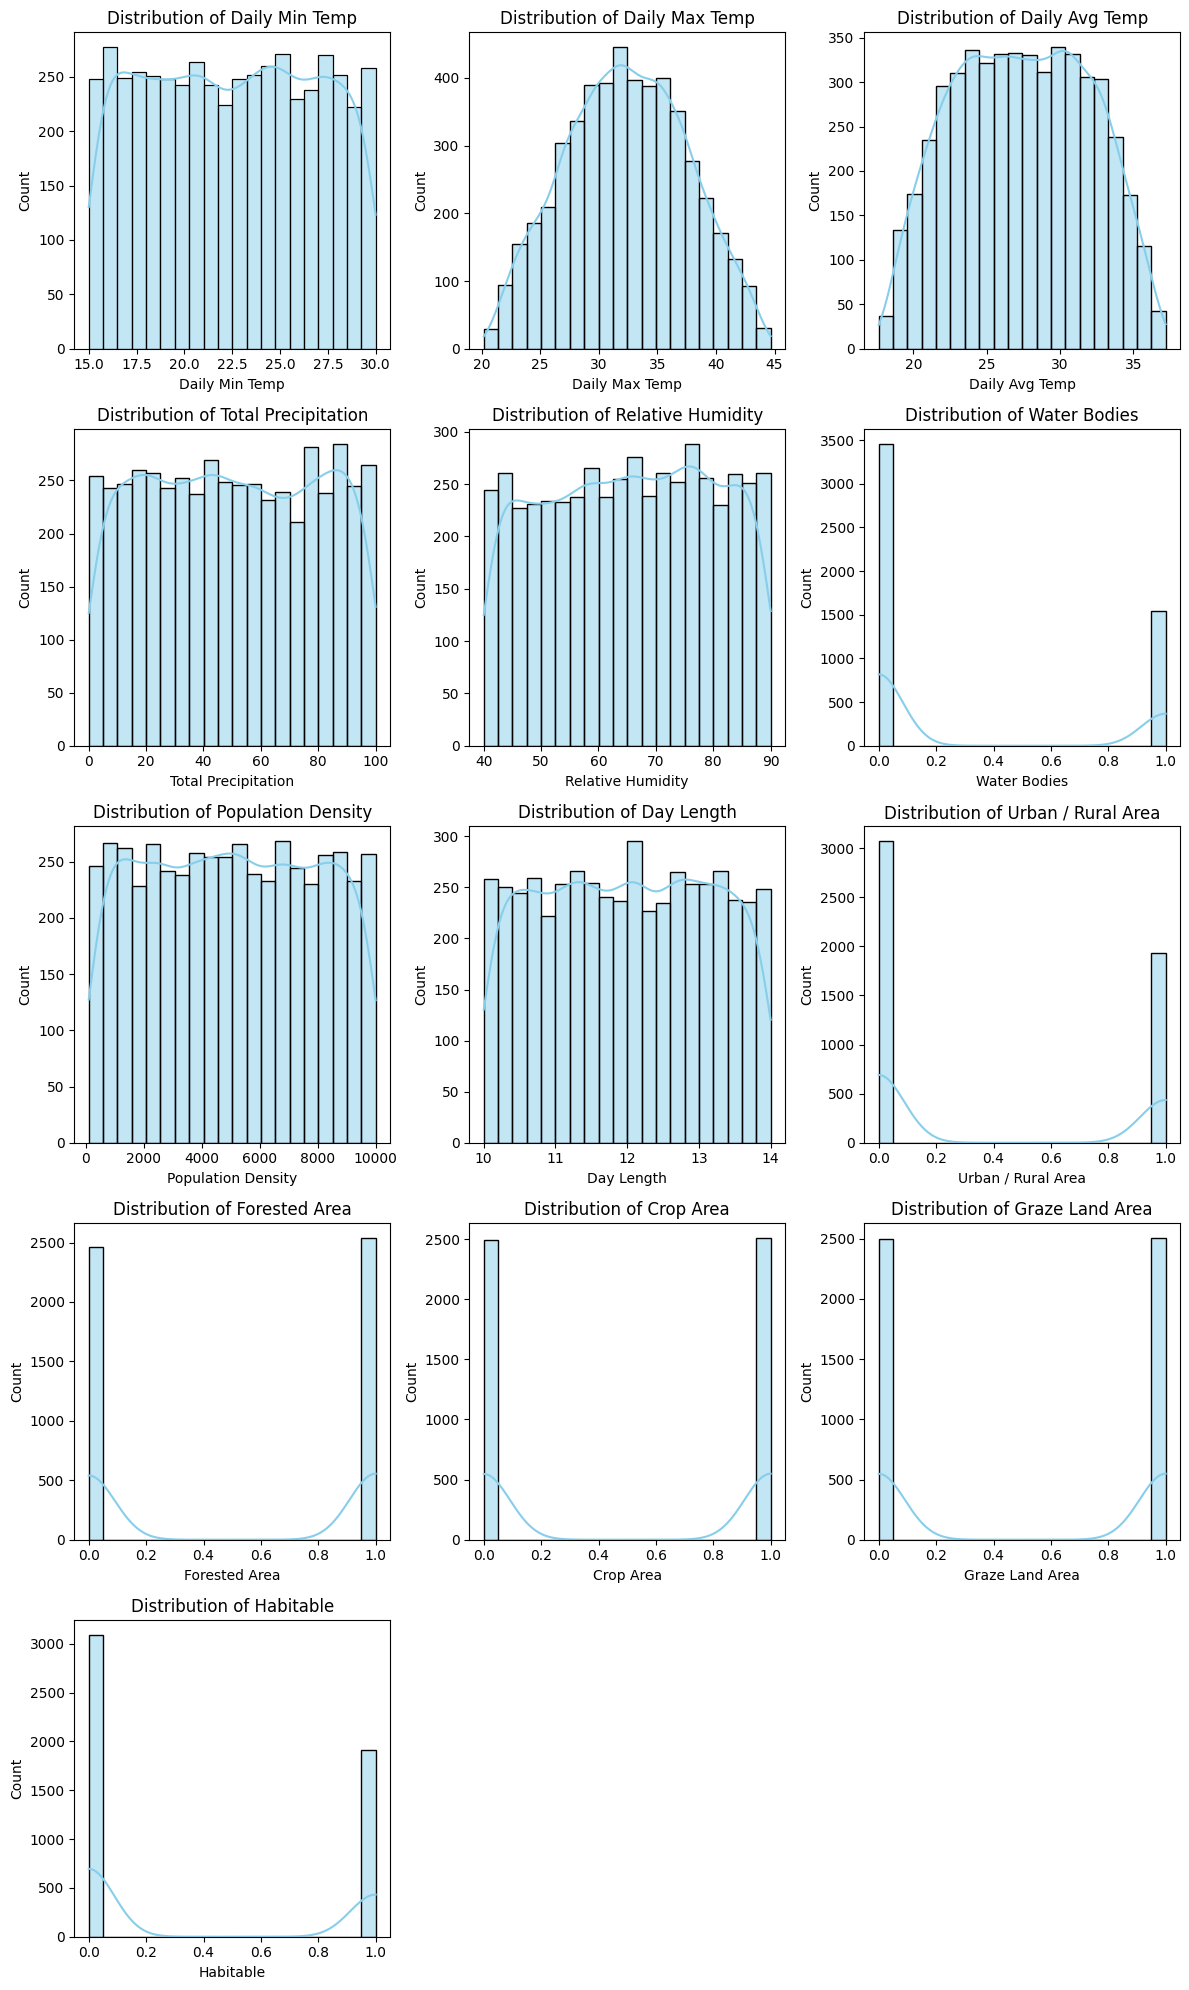

In [8]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numerical_cols)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)  

plt.figure(figsize=(12, rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

## Correlation of feature with target variable

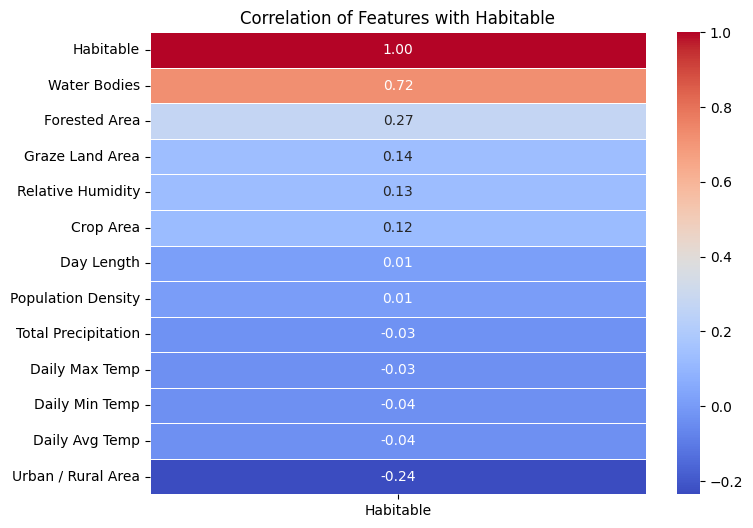

In [31]:
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

corr_target = numerical_cols.corr()['Habitable'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with Habitable')
plt.show()
